<a id='back_to_top'></a>
# Treasury Yield Curve
---
* [Section 1](#section_1): Sample code to visualize interest rates
* [Section 2](#section_2): Create function to visualize interest rates

In [1]:
import pandas as pd

pd.set_option("display.max_columns", 999)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md

import seaborn as sns

print('Seaborn version: ', sns.__version__)

Seaborn version:  0.11.1


<a id='section_1'></a>
### Section 1: Sample code to visualize interest rates 
[back to top](#back_to_top)

In [2]:
%%time

# Scrape treasury yield curve
str_year = '2018'
str_yield = f'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year={str_year}'    # Year
df_yield_curve = pd.read_html(str_yield)[1]

# convert date from str
df_yield_curve['Date'] = pd.to_datetime(df_yield_curve['Date'], format = '%m/%d/%y')

print(f'Dataframe shape: {df_yield_curve.shape} \n')
print(f'Dataframe columns: {df_yield_curve.columns} \n')

df_yield_curve.head()

Dataframe shape: (249, 13) 

Dataframe columns: Index(['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr'],
      dtype='object') 

CPU times: user 392 ms, sys: 32 ms, total: 424 ms
Wall time: 1.8 s


,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,2018-01-02,1.29,NaN,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81
1,2018-01-03,1.29,NaN,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78
2,2018-01-04,1.28,NaN,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79
3,2018-01-05,1.27,NaN,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81
4,2018-01-08,1.30,NaN,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81


In [3]:
# select subset of columns
ls_cols_select = ['Date', '2 yr', '5 yr', '10 yr', '30 yr']

# create new dataframe with select columns
df_yield_curve_select = df_yield_curve[ls_cols_select]
df_yield_curve_select = df_yield_curve_select.set_index('Date')

print(f'Dataframe shape: {df_yield_curve_select.shape} \n')
print(f'Dataframe columns: {df_yield_curve_select.columns} \n')

df_yield_curve_select.head()

Dataframe shape: (249, 4) 

Dataframe columns: Index(['2 yr', '5 yr', '10 yr', '30 yr'], dtype='object') 



,2 yr,5 yr,10 yr,30 yr
Date,,,,
2018-01-02,1.92,2.25,2.46,2.81
2018-01-03,1.94,2.25,2.44,2.78
2018-01-04,1.96,2.27,2.46,2.79
2018-01-05,1.96,2.29,2.47,2.81
2018-01-08,1.96,2.29,2.49,2.81


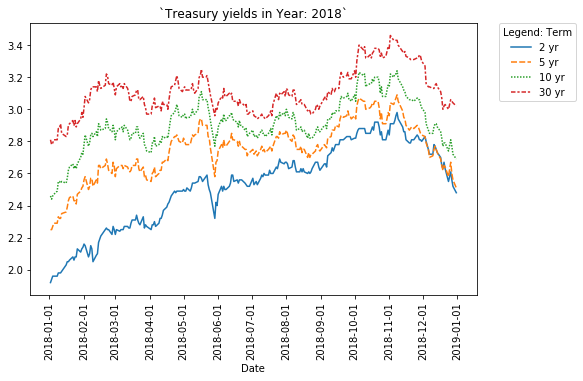

In [7]:
# ==================================================================================================
# Line plot, including adjusting x-axis density
# https://stackoverflow.com/questions/63218645/lowering-the-x-axis-value-density-for-dates-on-a-seaborn-line-plot-updated
# ==================================================================================================

fig, ax = plt.subplots(figsize = (8, 5))

sns.lineplot(ax = ax, data=df_yield_curve_select)

# specify the position of the major ticks 
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# put a title
plt.title(f"`Treasury yields in Year: {str_year}`")

# Rotates X-Axis Ticks by 90-degrees
plt.xticks(rotation = 90) 

# Put the legend out of the figure
plt.legend(title=f"Legend: Term", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<a id='section_2'></a>
### Section 2: Create function to visualize interest rates
[back to top](#back_to_top)

In [14]:
def visualize_year_rates(str_year):
    '''
    Visualize Treasury interest rates from a single year.
    '''
    
    # Scrape treasury yield curve
    str_yield = f'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year={str_year}'    # Year
    df_yield_curve = pd.read_html(str_yield)[1]

    # convert date from str
    df_yield_curve['Date'] = pd.to_datetime(df_yield_curve['Date'], format = '%m/%d/%y')
    
    # select subset of columns
    ls_cols_select = ['Date', '2 yr', '5 yr', '10 yr', '30 yr']

    # create new dataframe with select columns
    df_yield_curve_select = df_yield_curve[ls_cols_select]
    df_yield_curve_select = df_yield_curve_select.set_index('Date')
    
    # ==================================================================================================
    # Line plot, including adjusting x-axis density
    # https://stackoverflow.com/questions/63218645/lowering-the-x-axis-value-density-for-dates-on-a-seaborn-line-plot-updated
    # ==================================================================================================
    
    try:
        fig, ax = plt.subplots(figsize = (8, 5))

        sns.lineplot(ax = ax, data=df_yield_curve_select)

        # specify the position of the major ticks 
        ax.xaxis.set_major_locator(md.MonthLocator(bymonthday = 1))
        # specify the format of the labels as 'year-month-day'
        ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
        # (optional) rotate by 90° the labels in order to improve their spacing
        plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

        # put a title
        plt.title(f"Treasury Yields in Year: `{str_year}`")

        # Rotates X-Axis Ticks by 90-degrees
        plt.xticks(rotation = 90) 

        # Put the legend out of the figure
        plt.legend(title=f"Legend: Term", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        plt.show()
        print()
        
    except:
        print(f'Error visualizing year: {str_year}')
    
    return df_yield_curve

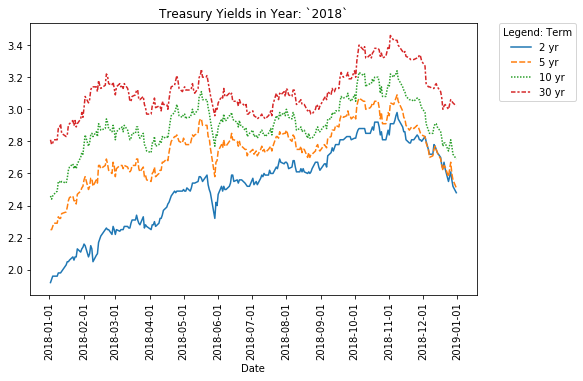

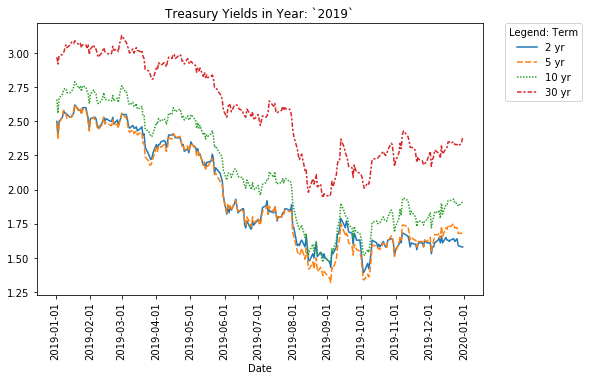

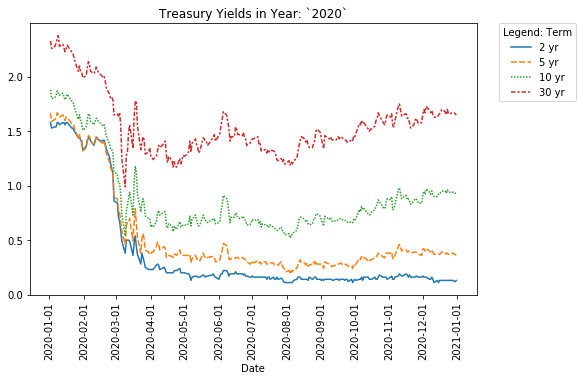

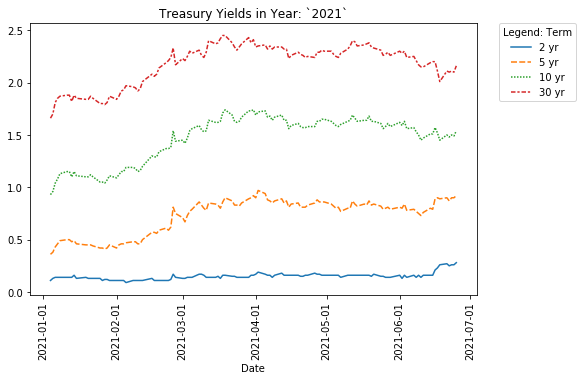

In [15]:
_ = visualize_year_rates('2018')
_ = visualize_year_rates('2019')
_ = visualize_year_rates('2020')
_ = visualize_year_rates('2021')